In [1]:
!pip install --quiet pyarrow fastparquet seaborn scikit-learn pandas matplotlib



This cell installs required packages (pyarrow, fastparquet, seaborn, scikit-learn, pandas, matplotlib) so Parquet files can be read and results can be plotted. On many systems these may already be installed; if so this cell will run quickly. If you run in an environment without install permissions, install packages externally or skip this cell.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


This cell imports commonly used data and plotting libraries: pandas and numpy for data manipulation, matplotlib and seaborn for visualization, and Path for filesystem paths. These imports are used throughout the notebook.

In [23]:
df = pd.read_parquet(r'F:\Microburbs\drive-download-20251012T232127Z-1-001\transactions.parquet', engine="fastparquet")

Reads the transactions dataset from a Parquet file into the DataFrame `df`. The `fastparquet` engine is specified. If the path is incorrect or the file is missing the read will fail — ensure `transactions.parquet` is present in the workspace path shown.

In [24]:
df.dtypes

gid                                  object
gnaf_pid                             object
listing_source                       object
state                                object
street                               object
suburb                               object
bedrooms                            float64
bathrooms                           float64
garage_spaces                       float64
building_size                        object
land_size                           float64
mb                                   object
sa1                                  object
poa                                  object
sal                                  object
typ                                  object
dat                          datetime64[ns]
price                               float64
zoning_appears_on_portals              bool
market                               object
hedonic_price                       float64
date_sold                            object
display_price                   

Displays the data types of each column in `df`. This helps confirm numerical columns (int/float) vs categorical/object columns and ensures subsequent numeric operations are applied to appropriate types.

In [27]:
df.rename(columns = {'price':'sale_price'}, inplace=True)

In [28]:
df

,gid,gnaf_pid,listing_source,state,street,suburb,bedrooms,bathrooms,garage_spaces,building_size,...,dat,sale_price,zoning_appears_on_portals,market,hedonic_price,date_sold,display_price,source,property_type,yield
10,9566571.0,GANSW705844500,Sold,NSW,64 ROSEVILLE AVE,ROSEVILLE,5.0,4.0,NaN,0 m²,...,2002-12-19,2155000.0,False,Roseville house buy,1.950000e+06,2002-12-19,2155000.0,nswlrs,UNKNOWN,NaN
28,8821081.0,GANSW706332342,Sold,NSW,18 PENKIVIL ST,WILLOUGHBY,NaN,NaN,NaN,0 m²,...,2002-12-19,925000.0,False,Willoughby (NSW) house buy,6.930000e+05,2002-12-19,925000.0,nswlrs,UNKNOWN,NaN
32,8944315.0,GANSW706324522,Sold,NSW,120/2 ARTARMON RD,WILLOUGHBY,NaN,NaN,NaN,None,...,2002-12-19,450000.0,False,Willoughby (NSW) unit buy,7.005405e+05,2002-12-19,450000.0,nswlrs,UNKNOWN,NaN
92,550002.0,GANSW705618555,Sold,NSW,12 PARKER ST,NORTHBRIDGE,4.0,5.0,NaN,0 m²,...,2002-12-20,2800000.0,False,Northbridge (NSW) house buy,1.400000e+06,2002-12-20,2800000.0,nswlrs,UNKNOWN,NaN
93,5584777.0,GANSW705618551,Sold,NSW,1 PARKER ST,NORTHBRIDGE,5.0,3.0,2.0,0 m²,...,2002-12-20,1225000.0,False,Northbridge (NSW) house buy,1.885000e+06,2002-12-20,1225000.0,nswlrs,UNKNOWN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600038,7263238.0,GANSW705859469,Sold,NSW,nan,ROSEVILLE,0.0,0.0,0.0,nan,...,2025-05-19,4350000.0,True,Roseville house buy,5.353846e+06,2025-05-19,4350000.0,nswlrs,NAN,NaN
600379,2458708.0,GANSW705565321,Sold,NSW,nan,NORTHBRIDGE,0.0,0.0,0.0,nan,...,2025-05-23,4900000.0,True,Northbridge (NSW) house buy,5.003554e+06,2025-05-23,4900000.0,nswlrs,NAN,NaN
601236,8199919.0,GANSW716752729,Sold,NSW,nan,NORTHBRIDGE,0.0,0.0,0.0,nan,...,2025-06-04,1200000.0,True,Northbridge (NSW) unit buy,2.400000e+06,2025-06-04,1200000.0,nswlrs,NAN,NaN
601413,14344113.0,GANSW710649300,Sold,NSW,nan,CASTLE COVE,0.0,0.0,0.0,nan,...,2025-06-06,3625000.0,True,Castle Cove house buy,4.737737e+06,2025-06-06,3625000.0,nswlrs,NAN,NaN


In [29]:
df[['sale_price','hedonic_price']]

,sale_price,hedonic_price
10,2155000.0,1.950000e+06
28,925000.0,6.930000e+05
32,450000.0,7.005405e+05
92,2800000.0,1.400000e+06
93,1225000.0,1.885000e+06
...,...,...
600038,4350000.0,5.353846e+06
600379,4900000.0,5.003554e+06
601236,1200000.0,2.400000e+06
601413,3625000.0,4.737737e+06


Shows the `sale_price` and `hedonic_price` columns for the DataFrame. This is useful to inspect the raw values used to compute mispricing and to check for obvious anomalies (zeros, negatives, or extreme values).

# Dataset Info

Section header indicating the following cell prints basic dataset info (non-null counts and memory usage) using `df.info()`.

In [30]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5576 entries, 10 to 603378
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   gid                        5576 non-null   object        
 1   gnaf_pid                   5576 non-null   object        
 2   listing_source             5576 non-null   object        
 3   state                      5576 non-null   object        
 4   street                     5576 non-null   object        
 5   suburb                     5576 non-null   object        
 6   bedrooms                   3940 non-null   float64       
 7   bathrooms                  3870 non-null   float64       
 8   garage_spaces              3696 non-null   float64       
 9   building_size              4255 non-null   object        
 10  land_size                  4169 non-null   float64       
 11  mb                         5576 non-null   object        
 12  sa1     

Prints DataFrame summary: column names, non-null counts and dtypes. Use this to verify missingness and whether columns were read in with expected types.

# Missing Values 

Section header: the next code cell computes the count of missing values per column to identify incomplete fields that may require imputation or filtering.

In [31]:
df.isnull().sum()

gid                             0
gnaf_pid                        0
listing_source                  0
state                           0
street                          0
suburb                          0
bedrooms                     1636
bathrooms                    1706
garage_spaces                1880
building_size                1321
land_size                    1407
mb                              0
sa1                             0
poa                             0
sal                             0
typ                             0
dat                             0
sale_price                     16
zoning_appears_on_portals       0
market                          0
hedonic_price                  17
date_sold                       0
display_price                   0
source                          0
property_type                   0
yield                        5576
dtype: int64

Computes the number of missing values for each column. High missing rates may indicate columns to drop or to impute before modeling/analysis.

# Numeric Stats

Section header: the following code cell computes descriptive statistics for key numeric columns (count, mean, std, min/max, quartiles).

In [34]:
df[['bedrooms','bathrooms','garage_spaces','land_size','hedonic_price','yield','sale_price']].describe()


,bedrooms,bathrooms,garage_spaces,land_size,hedonic_price,yield,sale_price
count,3940.000000,3870.000000,3696.000000,4.169000e+03,5.559000e+03,0.0,5.560000e+03
mean,3.423858,2.134625,1.768398,2.301811e+04,1.647374e+06,NaN,1.580499e+06
std,1.320273,1.037281,0.890447,1.338503e+06,1.591267e+06,NaN,1.520344e+06
min,0.000000,0.000000,0.000000,0.000000e+00,1.544318e+03,NaN,1.300000e+03
25%,3.000000,1.000000,1.000000,3.980000e+02,8.358733e+05,NaN,7.500000e+05
50%,4.000000,2.000000,2.000000,6.450000e+02,1.235799e+06,NaN,1.180000e+06
75%,4.000000,3.000000,2.000000,8.470000e+02,1.914756e+06,NaN,1.900000e+06
max,10.000000,10.000000,10.000000,8.626000e+07,3.700000e+07,NaN,1.950000e+07


Produces descriptive statistics (count, mean, std, min, 25/50/75%, max) for common numeric columns. Inspect these to check for unrealistic values (e.g., extremely large land_size or sale_price).

In [35]:
categorical_cols = ['state','suburb','property_type','market','listing_source','street','mb','sa1','poa','sal','typ']
print("\n=== Unique Values per Categorical Column ===")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")



=== Unique Values per Categorical Column ===
state: 1 unique values
suburb: 16 unique values
property_type: 3 unique values
market: 16 unique values
listing_source: 1 unique values
street: 4443 unique values
mb: 411 unique values
sa1: 98 unique values
poa: 3 unique values
sal: 9 unique values
typ: 2 unique values


Counts the number of unique values for several categorical columns. Useful to detect high-cardinality features that may need special handling (grouping, hashing) before modeling or summarization.

In [36]:
numeric_cols = ['bedrooms','bathrooms','garage_spaces','land_size','price','hedonic_price','yield','sale_price']
print("\n=== Outlier Check (Top 5%) ===")
for col in numeric_cols:
    threshold = df[col].quantile(0.95)
    outliers = df[df[col] > threshold]
    print(f"{col} - {len(outliers)} outliers above 95th percentile")


=== Outlier Check (Top 5%) ===
bedrooms - 98 outliers above 95th percentile
bathrooms - 62 outliers above 95th percentile
garage_spaces - 164 outliers above 95th percentile
land_size - 209 outliers above 95th percentile


KeyError: 'price'

Per-column outlier check: computes the 95th percentile for each numeric column and counts rows above that threshold. This gives a quick view of heavy-tail behavior and potential outliers to inspect or handle.

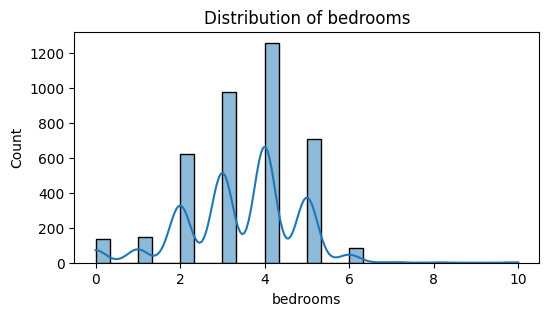

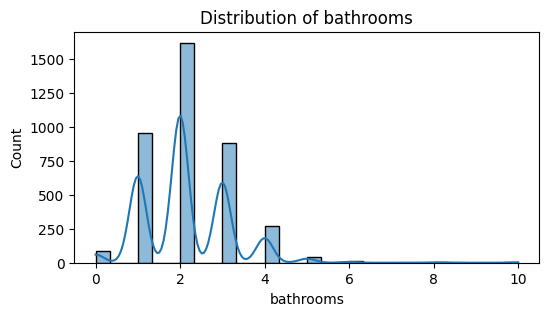

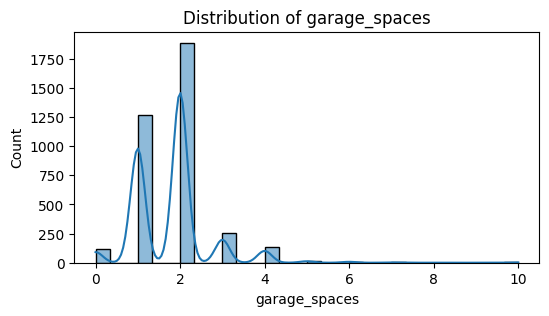

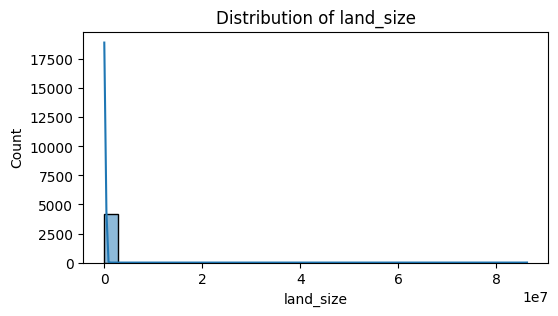

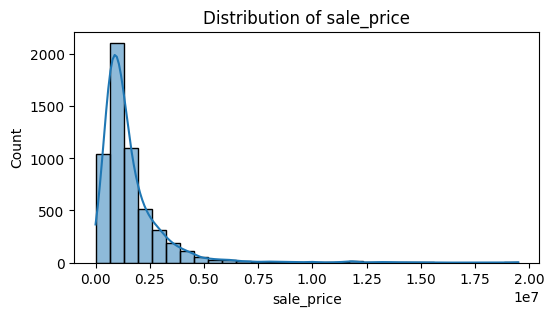

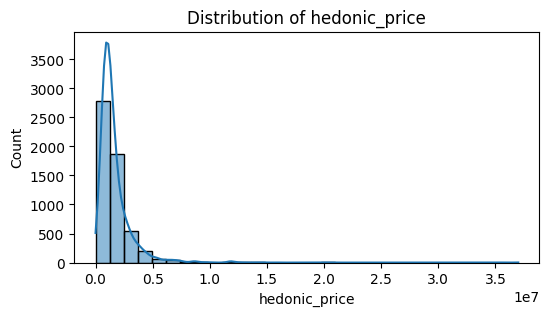

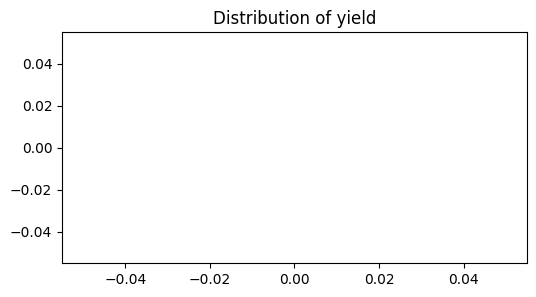

In [37]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,3))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Plots histograms (with KDE) for every numeric column. Use these plots to visually assess distributions, skewness, multimodality, and outliers. Rendering them inline helps choose transformations (log, winsorize) if needed.

# Hedonic Mispricing

Header for hedonic mispricing calculations. The following cells compute ratios and a mispricing measure comparing sale prices to hedonic model predictions.

**Objective:** Compare actual sale price against the hedonic price estimate to identify mispricing at the property level.  

**Explanation:**  
- `price_to_hedonic_ratio = sale_price / hedonic_price`  
- Ratio > 1 → property sold above its predicted value (overpriced)  
- Ratio < 1 → property sold below its predicted value (undervalued)


In [38]:
df['price_to_hedonic_ratio'] = df['sale_price'] / df['hedonic_price']

Creates a new column `price_to_hedonic_ratio` equal to sale_price divided by the hedonic model prediction. Values <1 indicate the sale was below the prediction; values >1 indicate the sale exceeded the prediction. Check for division-by-zero if any `hedonic_price` values are zero or null.

**Objective:** Transform the price ratio into an intuitive mispricing metric.  

**Explanation:**  
- `hedonic_mispricing = 1 - price_to_hedonic_ratio`  
- Positive values indicate undervaluation (potential investment opportunity)  
- Negative values indicate overvaluation (caution required)


In [39]:
df['hedonic_mispricing'] = 1 - df['price_to_hedonic_ratio']


Computes `hedonic_mispricing = 1 - price_to_hedonic_ratio`. Positive `hedonic_mispricing` means the sale price is below the hedonic prediction (potential undervaluation); negative values indicate overvaluation. This is the primary metric used later for ranking suburbs and flagging properties.

<Axes: title={'center': 'Hedonic Mispricing Distribution'}, ylabel='Frequency'>

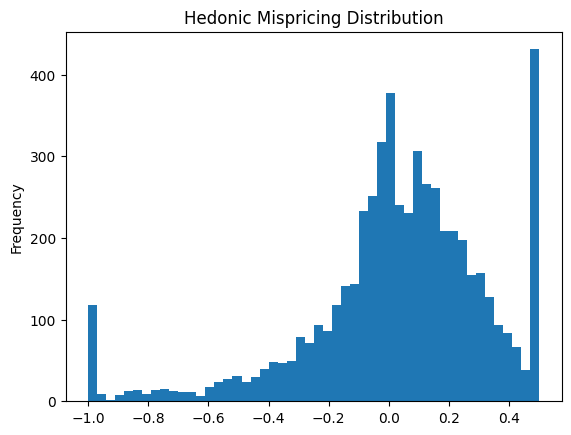

In [40]:
df['hedonic_mispricing'].plot(kind='hist', bins=50, title='Hedonic Mispricing Distribution')

**Objective:** Get an overview of the distribution of hedonic mispricing across all properties.  

**Explanation:**  
- `describe()` shows mean, median, min, max, and quartiles  
- Helps understand typical mispricing levels and detect extreme values


In [41]:
print("=== Hedonic Mispricing Stats ===")
df['hedonic_mispricing'].describe()

=== Hedonic Mispricing Stats ===


count    5559.000000
mean        0.032338
std         0.305886
min        -1.000000
25%        -0.087627
50%         0.056798
75%         0.224187
max         0.500000
Name: hedonic_mispricing, dtype: float64

Prints summary statistics for the `hedonic_mispricing` series (count, mean, std, min/max, quartiles). Use this to understand the central tendency and spread of mispricing across the dataset.

**Objective:** Flag properties that are extreme outliers in terms of undervaluation or overvaluation.  

**Explanation:**  
- `undervalued_threshold = 95th percentile`  
- `overvalued_threshold = 5th percentile`  
- Filtering properties above/below these thresholds identifies high-alpha or risky listings


In [42]:
undervalued_threshold = df['hedonic_mispricing'].quantile(0.95)
overvalued_threshold = df['hedonic_mispricing'].quantile(0.05)

undervalued_properties = df[df['hedonic_mispricing'] >= undervalued_threshold]
overvalued_properties = df[df['hedonic_mispricing'] <= overvalued_threshold]

Calculates the 95th and 5th percentile thresholds of `hedonic_mispricing` to define top undervalued and overvalued properties. It then filters `df` into two DataFrames: `undervalued_properties` and `overvalued_properties`. These selections are used for detailed inspection and counts.

In [43]:
print(f"Number of Top Undervalued Properties: {len(undervalued_properties)}")
print(f"Number of Top Overvalued Properties: {len(overvalued_properties)}")

Number of Top Undervalued Properties: 391
Number of Top Overvalued Properties: 278


Prints the number of properties flagged as top undervalued and top overvalued. Expect these counts to be roughly 5% of the dataset each, though ties at the threshold can affect exact counts.

**Objective:** Analyze mispricing at the micro-market (suburb) level rather than individual properties.  

**Explanation:**  
- Group by `suburb` and calculate:  
    - `avg_mispricing` → average mispricing in the suburb  
    - `median_price` → typical property price  
    - `median_yield` → typical rental yield  
    - `count_properties` → liquidity indicator  
- Helps investors spot undervalued micro-markets


In [44]:
suburb_summary = df.groupby('suburb').agg(
    avg_mispricing=('hedonic_mispricing', 'mean'),
    median_price=('sale_price', 'median'),
    median_yield=('yield', 'median'),
    count_properties=('sale_price', 'count')
).reset_index()

Aggregates results at the `suburb` level: computes average mispricing, median sale price, median yield, and property counts. This summary is useful to rank suburbs by typical undervaluation and identify candidate areas for further investigation.

In [45]:
suburb_summary = suburb_summary.sort_values('avg_mispricing', ascending=False)


Sorts the `suburb_summary` DataFrame by `avg_mispricing` in descending order so suburbs with the largest average undervaluation appear first.

### Top Suburbs by Average Hedonic Undervaluation 

**Objective:** Identify the top suburbs with systematic undervaluation.  

**Explanation:**  
- Sorting by `avg_mispricing` in descending order highlights suburbs where the market may be underpricing properties consistently  
- Useful for investors looking for **macro + micro alpha opportunities**


In [46]:
suburb_summary.head(10)

,suburb,avg_mispricing,median_price,median_yield,count_properties
15,WOLLONGONG,0.342550,700000.0,NaN,1
3,EAST CHATSWOOD,0.117472,585000.0,NaN,1
8,NORTHBRIDGE,0.058372,1400000.0,NaN,931
7,NORTH WILLOUGHBY,0.055093,1122500.0,NaN,614
14,WILLOUHBY,0.049676,577500.0,NaN,1
9,ROSEVILLE,0.039860,997750.0,NaN,1804
12,WILLOUGHBY EAST,0.029648,1380000.0,NaN,215
11,WILLOUGHBY,0.028923,980000.0,NaN,1042
6,MIDDLE COVE,0.023796,1251400.0,NaN,150
10,ROSEVILLE CHASE,0.012171,1285000.0,NaN,174


Displays the top 10 rows of `suburb_summary`. This is the final quick view of suburbs ordered by average hedonic undervaluation; review the `count_properties` column to ensure there are enough observations for each suburb before trusting the average.

# Price Volatility & Risk

**Objective:** Measure price volatility at the suburb level to assess risk for investors.  

**Explanation:**  
- Group properties by `suburb` and calculate the standard deviation of `sale_price`.  
- High standard deviation indicates unstable pricing, higher investment risk.  
- Low standard deviation indicates more stable, predictable markets.


In [47]:
suburb_volatility = df.groupby('suburb').agg(
    price_std=('sale_price', 'std'),
    median_price=('sale_price', 'median'),
    property_count=('sale_price', 'count')
).dropna(subset=['price_std']).reset_index()

print("=== Suburb-Level Price Volatility ===")
suburb_volatility.head()

=== Suburb-Level Price Volatility ===


,suburb,price_std,median_price,property_count
0,CASTLE COVE,1.858725e+06,1565000.0,261
1,CASTLECRAG,1.603141e+06,1860000.0,338
2,CHATSWOOD,7.236247e+05,1030000.0,11
3,EAST ROSEVILLE,9.563619e+05,1033750.0,2
4,LINDFIELD,1.359356e+06,2500000.0,9


**Objective:** Standardize volatility so it can be combined with other metrics in an Investor Score.  

**Explanation:**  
- Investors prefer low volatility, so we invert the metric: higher normalized score = safer.  
- Use z-score normalization for comparability with other metrics like hedonic mispricing.


In [48]:
from scipy.stats import zscore

suburb_volatility['volatility_score'] = -suburb_volatility['price_std']

suburb_volatility['volatility_score_z'] = zscore(suburb_volatility['volatility_score'])

print("=== Volatility Scores (Z-Score) ===")
print(suburb_volatility[['suburb','price_std','volatility_score_z']].head())


=== Volatility Scores (Z-Score) ===
           suburb     price_std  volatility_score_z
0     CASTLE COVE  1.858725e+06           -1.393994
1      CASTLECRAG  1.603141e+06           -0.871817
2       CHATSWOOD  7.236247e+05            0.925098
3  EAST ROSEVILLE  9.563619e+05            0.449599
4       LINDFIELD  1.359356e+06           -0.373747


**Objective:** Measure price volatility at a finer micro-location (street) level for detailed insights.  

**Explanation:**  
- Group by `street` (or `suburb + street`) and calculate standard deviation of `sale_price`.  
- Helps identify streets that are more stable vs streets with highly fluctuating prices.


In [49]:
street_volatility = df.groupby(['suburb','street']).agg(
    price_std=('sale_price', 'std'),
    median_price=('sale_price', 'median'),
    property_count=('sale_price', 'count')
).dropna(subset=['price_std']).reset_index()

street_volatility['volatility_score'] = -street_volatility['price_std']
street_volatility['volatility_score_z'] = zscore(street_volatility['volatility_score'])

print("=== Street-Level Volatility Scores ===")
street_volatility.head()


=== Street-Level Volatility Scores ===


,suburb,street,price_std,median_price,property_count,volatility_score,volatility_score_z
0,CASTLE COVE,1 BAMPI PL,4.384062e+05,2190000.0,2,-4.384062e+05,0.138425
1,CASTLE COVE,10 ALLAMBIE RD,2.333452e+05,1215000.0,2,-2.333452e+05,0.366992
2,CASTLE COVE,10 WILLOWIE RD,3.203194e+06,4105000.0,2,-3.203194e+06,-2.943292
3,CASTLE COVE,114 DEEPWATER RD,9.616652e+05,2080000.0,2,-9.616652e+05,-0.444816
4,CASTLE COVE,116 DEEPWATER RD,5.091169e+05,1740000.0,2,-5.091169e+05,0.059609



**Investor Takeaways:**  
- Suburbs or streets with **high volatility (low score)** are riskier investments.  
- Low-volatility areas are more predictable for capital growth.  
- This metric can be combined with **hedonic mispricing** and **liquidity** to create a composite Investor Score.


# Liquidity / Turnover

**Objective:** Measure property transaction frequency at the suburb level to understand market liquidity.  

**Explanation:**  
- Count the number of sales (`sale_price`) in each suburb over the dataset period.  
- More transactions → easier exit → more liquid market.  
- This is a proxy for turnover and investor-friendly markets.


In [50]:
suburb_turnover = df.groupby('suburb').agg(
    sales_count=('sale_price', 'count'),
    median_price=('sale_price', 'median')
).reset_index()

suburb_turnover = suburb_turnover.sort_values('sales_count', ascending=False)
print("=== Top Suburbs by Liquidity ===")
suburb_turnover.head(10)

=== Top Suburbs by Liquidity ===


,suburb,sales_count,median_price
9,ROSEVILLE,1804,997750.0
11,WILLOUGHBY,1042,980000.0
8,NORTHBRIDGE,931,1400000.0
7,NORTH WILLOUGHBY,614,1122500.0
1,CASTLECRAG,338,1860000.0
0,CASTLE COVE,261,1565000.0
12,WILLOUGHBY EAST,215,1380000.0
10,ROSEVILLE CHASE,174,1285000.0
6,MIDDLE COVE,150,1251400.0
2,CHATSWOOD,11,1030000.0


**Objective:** Standardize turnover so it can be combined with other metrics in a composite Investor Score.  

**Explanation:**  
- Normalize using z-score.  
- Higher z-score → more liquid suburb → more attractive for investors.


In [51]:

suburb_turnover['turnover_score_z'] = zscore(suburb_turnover['sales_count'])

print("=== Suburb Turnover Scores ===")
suburb_turnover[['suburb','sales_count','turnover_score_z']].head(10)


=== Suburb Turnover Scores ===


,suburb,sales_count,turnover_score_z
9,ROSEVILLE,1804,2.937540
11,WILLOUGHBY,1042,1.400701
8,NORTHBRIDGE,931,1.176831
7,NORTH WILLOUGHBY,614,0.537490
1,CASTLECRAG,338,-0.019160
0,CASTLE COVE,261,-0.174457
12,WILLOUGHBY EAST,215,-0.267232
10,ROSEVILLE CHASE,174,-0.349923
6,MIDDLE COVE,150,-0.398328
2,CHATSWOOD,11,-0.678670


**Objective:** Measure liquidity at a finer street level for detailed investor insight.  

**Explanation:**  
- Group by `suburb + street` and count transactions.  
- Streets with high turnover are easier to exit; low-turnover streets are less liquid.


In [52]:
street_turnover = df.groupby(['suburb','street']).agg(
    sales_count=('sale_price', 'count'),
    median_price=('sale_price', 'median')
).reset_index()

street_turnover['turnover_score_z'] = zscore(street_turnover['sales_count'])

print("=== Street-Level Turnover Scores ===")
street_turnover.head(10)


=== Street-Level Turnover Scores ===


,suburb,street,sales_count,median_price,turnover_score_z
0,CASTLE COVE,1 ALLAMBIE RD,1,1050000.0,-0.254874
1,CASTLE COVE,1 BAMPI PL,2,2190000.0,0.813409
2,CASTLE COVE,1 EMERSTAN DR,1,4500000.0,-0.254874
3,CASTLE COVE,1 KENDALL RD,1,1310000.0,-0.254874
4,CASTLE COVE,1 WILLIS RD,1,2080000.0,-0.254874
5,CASTLE COVE,10 ALLAMBIE RD,2,1215000.0,0.813409
6,CASTLE COVE,10 HEADLAND RD,1,953888.0,-0.254874
7,CASTLE COVE,10 HOLLY ST,1,2200000.0,-0.254874
8,CASTLE COVE,10 KORINYA RD,1,200000.0,-0.254874
9,CASTLE COVE,10 WILLOWIE RD,2,4105000.0,0.813409


**Investor Takeaways:**  
- High-turnover suburbs/streets are easier to buy and sell → lower exit risk.  
- Low-turnover areas may have higher price swings and less liquidity → higher risk.  
- This metric complements **hedonic mispricing** (alpha) and **volatility** (risk) for a complete investor evaluation.
